In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.preprocessing import StandardScaler

In [3]:
class AdalinePerceptron:

    def __init__(self, eta, epochs, log=False):
        self.eta = eta
        self.epochs = epochs
        self.log = log

    def get_activation(self, X):
        return np.dot(X, self.w)

    def predict(self, X):
        ones = np.ones((X.shape[0], 1))
        X_1 = np.append(X, ones, axis=1)
        return np.where(self.get_activation(X_1) > 0, 1, -1)

    def fit(self, X, y):
        ones = np.ones((X.shape[0], 1))
        X_1 = np.append(X, ones, axis=1)
        self.w = np.random.random((X_1.shape[1]))
        list_of_errors = []
        
        for epoch in range(self.epochs):
            error = 0
            activation = self.get_activation(X_1)
            delta_w = self.eta * np.dot((y - activation), X_1)
            self.w += delta_w

            if self.log:
                error = 1/2 * (np.square((y - activation)).sum())
                print(f"Epoch: {epoch+1}, error: {error}")
                list_of_errors.append(error)

        if self.log:
            plt.plot(range(self.epochs), list_of_errors)                

In [4]:
diag = pd.read_csv(r'../zasoby/breast_cancer.csv')
diag.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
X = diag[['area_mean', 'area_se', 'texture_mean', 'concavity_worst', 'concavity_mean']]
y = diag['diagnosis']

In [6]:
y = y.apply(lambda x: 1 if x == 'M' else -1)
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

Epoch: 1, error: 15043171.274437714
Epoch: 2, error: 7062424.276115418
Epoch: 3, error: 3330075.2387320893
Epoch: 4, error: 1584559.557113074
Epoch: 5, error: 768219.2655066764
Epoch: 6, error: 386423.18247967993
Epoch: 7, error: 207848.88284259057
Epoch: 8, error: 124314.62146884829
Epoch: 9, error: 85227.422032006
Epoch: 10, error: 66926.64518978332
Epoch: 11, error: 58347.00292520899
Epoch: 12, error: 54313.63088196815
Epoch: 13, error: 52406.418422481525
Epoch: 14, error: 51493.56089327879
Epoch: 15, error: 51045.75116995632
Epoch: 16, error: 50815.45002876823
Epoch: 17, error: 50686.89164920835
Epoch: 18, error: 50605.93621488352
Epoch: 19, error: 50547.26432604916
Epoch: 20, error: 50499.03492588601
Epoch: 21, error: 50455.71032683515
Epoch: 22, error: 50414.70071589587
Epoch: 23, error: 50374.79490221865
Epoch: 24, error: 50335.42643035022
Epoch: 25, error: 50296.33036599606
Epoch: 26, error: 50257.38278622451
Epoch: 27, error: 50218.525714415286
Epoch: 28, error: 50179.73201485

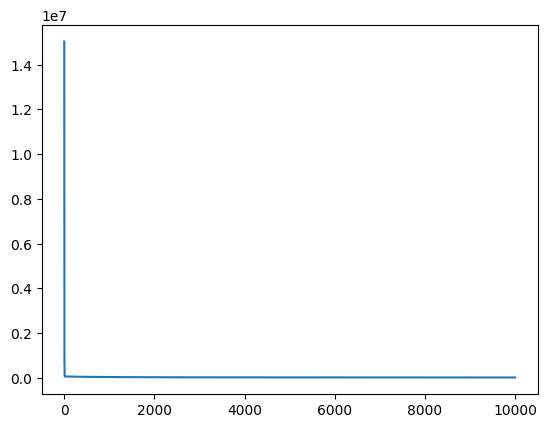

In [7]:
perceptronNS = AdalinePerceptron(0.000000001, 10000, True)
perceptronNS.fit(X, y)

In [12]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled[:10]

array([[ 0.9843749 ,  2.48757756, -2.07333501,  2.10952635,  2.65287398],
       [ 1.90870825,  0.74240195, -0.35363241, -0.14674897, -0.02384586],
       [ 1.55888363,  1.18133606,  0.45618695,  0.85497394,  1.36347845],
       [-0.76446379, -0.28837815,  0.25373211,  1.98958826,  1.91589718],
       [ 1.82622928,  1.19035676, -1.15181643,  0.61317876,  1.37101143],
       [-0.50565045, -0.28925822, -0.8353353 ,  1.2632432 ,  0.8663016 ],
       [ 1.09529491,  0.29862746,  0.16064943,  0.50955225,  0.3000724 ],
       [-0.21896491,  0.23372242,  0.35845013, -0.02105385,  0.06102575],
       [-0.38420727, -0.35240312,  0.58882978,  1.28003453,  1.21909628],
       [-0.50906338, -0.36076377,  1.10543868,  3.99543285,  1.73887209]])

Epoch: 1, error: 1136.090436693276
Epoch: 2, error: 848.5551081027465
Epoch: 3, error: 649.0858202682759
Epoch: 4, error: 509.71628453729204
Epoch: 5, error: 411.4694062642186
Epoch: 6, error: 341.4563332816575
Epoch: 7, error: 290.9129183371045
Epoch: 8, error: 253.87054751838681
Epoch: 9, error: 226.25627048277468
Epoch: 10, error: 205.2834696931138
Epoch: 11, error: 189.03916930900297
Epoch: 12, error: 176.2044417921618
Epoch: 13, error: 165.86491213938513
Epoch: 14, error: 157.38225976644185
Epoch: 15, error: 150.30702399483573
Epoch: 16, error: 144.3193839921062
Epoch: 17, error: 139.1888911637243
Epoch: 18, error: 134.74704672938148
Epoch: 19, error: 130.86858974332878
Epoch: 20, error: 127.45869577155905
Epoch: 21, error: 124.44418995162577
Epoch: 22, error: 121.76748971670182
Epoch: 23, error: 119.38240644765672
Epoch: 24, error: 117.251215592291
Epoch: 25, error: 115.34259457687085
Epoch: 26, error: 113.63015637663008
Epoch: 27, error: 112.09139369908124
Epoch: 28, error: 110.

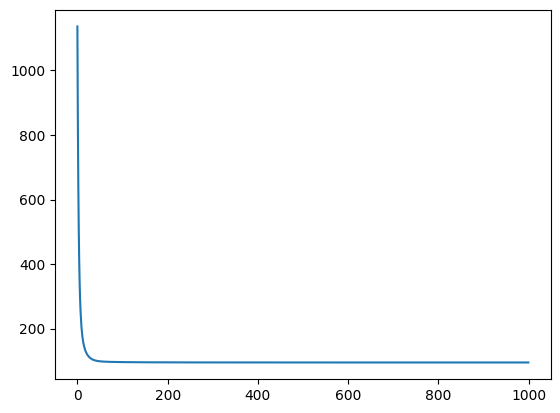

In [16]:
perceptron = AdalinePerceptron(0.0001, 1000, True)
perceptron.fit(X_scaled, y)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

Epoch: 1, error: 242.79382189352356
Epoch: 2, error: 128.45565056091124
Epoch: 3, error: 103.76581004982924
Epoch: 4, error: 95.80225319495263
Epoch: 5, error: 91.72672030884618
Epoch: 6, error: 88.94475097074063
Epoch: 7, error: 86.79529152707048
Epoch: 8, error: 85.04961564446737
Epoch: 9, error: 83.60079107992816
Epoch: 10, error: 82.38586232398218
Epoch: 11, error: 81.36170871795247
Epoch: 12, error: 80.4959636588963
Epoch: 13, error: 79.7630091586051
Epoch: 14, error: 79.14194926268058
Epoch: 15, error: 78.61544822370618
Epoch: 16, error: 78.16898575918022
Epoch: 17, error: 77.79033375926346
Epoch: 18, error: 77.4691626401343
Epoch: 19, error: 77.19673116494207
Epoch: 20, error: 76.96563469757648
Epoch: 21, error: 76.76959715080358
Epoch: 22, error: 76.60329717765941
Epoch: 23, error: 76.46222204338024
Epoch: 24, error: 76.34254431157837
Epoch: 25, error: 76.2410175568521
Epoch: 26, error: 76.15488805673908
Epoch: 27, error: 76.0818199595935
Epoch: 28, error: 76.01983184478158
Epo

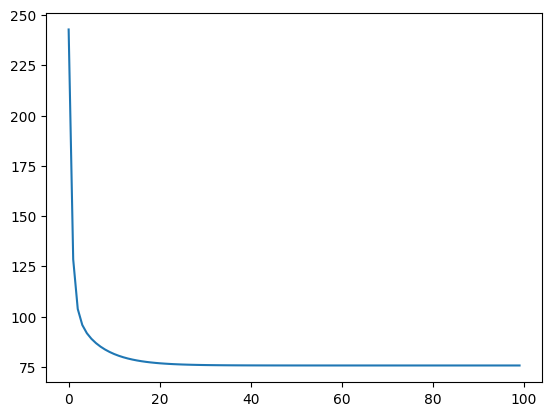

In [35]:
perceptronF = AdalinePerceptron(0.001, 100, True)
perceptronF.fit(X_train, y_train)

In [36]:
y_pred = perceptronF.predict(X_test)

In [37]:
# y_good = np.where(y_pred == y_test, 1, 0)
# good = np.count_nonzero(y_good)
good = y_test[y_test == y_pred].count()

In [38]:
score = good / len(y_pred)
score

0.9210526315789473